### Goal: Compare the distribution of each scneario

In [11]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
#sns.set(style="darkgrid")
#sns.set(style="whitegrid")
#sns.set_style("white")
sns.set(style="whitegrid",font_scale=2)
import matplotlib.collections as clt
import ptitprince as pt
import numpy as np

Load data

In [12]:
# File names
filenames = ["post_data/noDR-AF-T-1hr.csv", "post_data/noDR-AF-F.csv", "post_data/noDR-AF-H.csv", "post_data/noDR-AF-TFH-1hr.csv", 
             "post_data/noDR-noAF-T-1hr.csv", "post_data/noDR-noAF-F.csv", "post_data/noDR-noAF-H.csv", "post_data/noDR-noAF-TFH-1hr.csv", 
             "post_data/Shed-AF-T-1hr.csv", "post_data/Shed-AF-F.csv", "post_data/Shed-AF-H.csv", "post_data/Shed-AF-TFH-1hr.csv",
             "post_data/Shed-noAF-T-1hr.csv", "post_data/Shed-noAF-F.csv", "post_data/Shed-noAF-H.csv", "post_data/Shed-noAF-TFH-1hr.csv"]
source_labels = ["noDR-AF-T", "noDR-AF-F", "noDR-AF-H", "noDR-AF-TFH",
                 "noDR-noAF-T", "noDR-noAF-F","noDR-noAF-H", "noDR-noAF-TFH",
                 "Shed-AF-T", "Shed-AF-F", "Shed-AF-H", "Shed-AF-TFH",
                 "Shed-noAF-T", "Shed-noAF-F", "Shed-noAF-H", "Shed-noAF-TFH"]

# Empty dictionary to store data frames
dataframes = {}

# Load data iteratively
for label, filename in zip(source_labels, filenames): 
    dataframes[label] = pd.read_csv(filename, sep=",")

# Add a column to include label
for label, df in dataframes.items():
    df["Source"] = label

Statistical rationale for simulation repetitions 

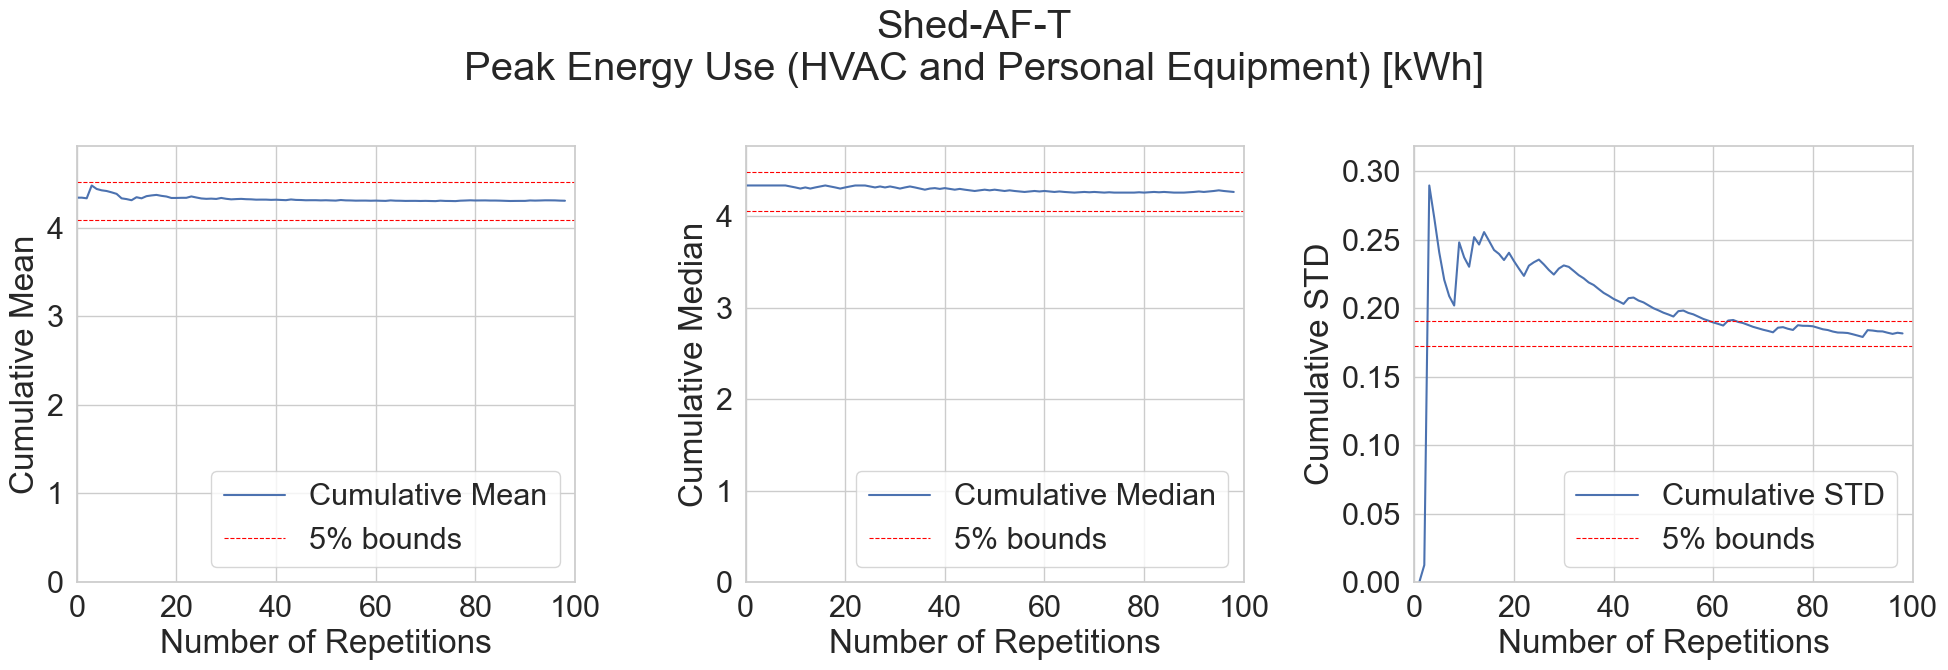

{'noDR-AF-T': 0.02, 'noDR-AF-F': 0.0, 'noDR-AF-H': 0.32, 'noDR-AF-TFH': 0.14, 'noDR-noAF-T': 0.09, 'noDR-noAF-F': 0.02, 'noDR-noAF-H': 0.79, 'noDR-noAF-TFH': 0.01, 'Shed-AF-T': 0.04, 'Shed-AF-F': 0.02, 'Shed-AF-H': 0.06, 'Shed-AF-TFH': 0.41, 'Shed-noAF-T': 0.06, 'Shed-noAF-F': 0.01, 'Shed-noAF-H': 1.26, 'Shed-noAF-TFH': 0.11}
{'noDR-AF-T': 0.19, 'noDR-AF-F': 0.01, 'noDR-AF-H': 0.0, 'noDR-AF-TFH': 0.17, 'noDR-noAF-T': 0.0, 'noDR-noAF-F': 0.01, 'noDR-noAF-H': 0.0, 'noDR-noAF-TFH': 0.09, 'Shed-AF-T': 0.08, 'Shed-AF-F': 0.0, 'Shed-AF-H': 0.3, 'Shed-AF-TFH': 1.31, 'Shed-noAF-T': 0.02, 'Shed-noAF-F': 0.0, 'Shed-noAF-H': 0.0, 'Shed-noAF-TFH': 0.0}
{'noDR-AF-T': 0.07, 'noDR-AF-F': 1.59, 'noDR-AF-H': 0.89, 'noDR-AF-TFH': 3.25, 'noDR-noAF-T': 3.42, 'noDR-noAF-F': 0.31, 'noDR-noAF-H': 0.15, 'noDR-noAF-TFH': 1.86, 'Shed-AF-T': 0.87, 'Shed-AF-F': 1.99, 'Shed-AF-H': 1.08, 'Shed-AF-TFH': 1.32, 'Shed-noAF-T': 0.75, 'Shed-noAF-F': 3.69, 'Shed-noAF-H': 0.39, 'Shed-noAF-TFH': 1.92}


In [13]:
# Create dictionaries to record stability values for each dataframe
cum_mean_stabs = {}
cum_median_stabs = {}
cum_std_stabs = {}

# Iterate over all dataframes in the dictionary and process them
for key, df in dataframes.items():

    # Calculation of critical statistics
    source_title = df["Source"].iloc[1]
    # column_name = "Daily Energy Use (HVAC and Personal Equipment) [kWh]"
    column_name = "Peak Energy Use (HVAC and Personal Equipment) [kWh]"
    # column_name = "Daily FF (HVAC and Personal Equipment)"
    data_array = df[column_name]
    cum_mean = data_array.expanding().mean()
    cum_median = data_array.expanding().median()
    cum_std = data_array.expanding().std()

    # Stability
    cum_mean_stab = round(abs((cum_mean.iloc[-1] - cum_mean.iloc[-10])/cum_mean.iloc[-1])*100, 2)
    cum_median_stab = round(abs((cum_median.iloc[-1] - cum_median.iloc[-10])/cum_median.iloc[-1])*100, 2)
    cum_std_stab = round(abs((cum_std.iloc[-1] - cum_std.iloc[-10])/cum_std.iloc[-1])*100, 2)

    # Store
    cum_mean_stabs[key] = cum_mean_stab
    cum_median_stabs[key] = cum_median_stab
    cum_std_stabs[key] = cum_std_stab

    # Print stability values
    # for key in dataframes.keys():
    #     print(f"{key}:")
    #     print(f"Cumulative Mean Stability: {cum_mean_stabs[key]}%")
    #     print(f"Cumulative Median Stability: {cum_median_stabs[key]}%")
    #     print(f"Cumulative Standard Deviation Stability: {cum_std_stabs[key]}%")
    #     print()

    # Plotting Cumulative Mean
    if key == "Shed-AF-T":
        fig = plt.figure(figsize=(20,7))
        fig.suptitle(f"{source_title}\n{column_name}")

        # Cummulative mean
        ax1 = fig.add_subplot(1, 3, 1)
        ax1.plot(cum_mean, label="Cumulative Mean")
        ax1.set_xlabel("Number of Repetitions")
        ax1.set_ylabel("Cumulative Mean")
        ax1.set_xlim([0,100])
        ax1.set_ylim([0, 1.1*max(cum_mean)])
        # ax1.set_ylim([-1,1])
        final_mean_value = cum_mean.iloc[-1]
        ax1.axhline(final_mean_value * 1.05, color='red', linestyle='--', linewidth=0.8, label='5% bounds')  # 5% above
        ax1.axhline(final_mean_value * 0.95, color='red', linestyle='--', linewidth=0.8)  # 5% below
        ax1.legend(loc='lower right')

        # Cummulative median
        ax2 = fig.add_subplot(1, 3, 2)
        ax2.plot(cum_median, label="Cumulative Median")
        ax2.set_xlabel("Number of Repetitions")
        ax2.set_ylabel("Cumulative Median")
        ax2.set_xlim([0,100])
        ax2.set_ylim([0, 1.1*max(cum_median)])
        # ax2.set_ylim([-1,1])
        final_median_value = cum_median.iloc[-1]
        ax2.axhline(final_median_value * 1.05, color='red', linestyle='--', linewidth=0.8, label='5% bounds')  # 5% above
        ax2.axhline(final_median_value * 0.95, color='red', linestyle='--', linewidth=0.8)  # 5% below
        ax2.legend(loc='lower right')

        # Cummulative standard deviation
        ax3 = fig.add_subplot(1, 3, 3)
        ax3.plot(cum_std, label="Cumulative STD")
        ax3.set_xlabel("Number of Repetitions")
        ax3.set_ylabel("Cumulative STD")
        ax3.set_xlim([0,100])
        ax3.set_ylim([0, 1.1*max(cum_std[1:])])
        # ax3.set_ylim([-1,1])
        final_std_value = cum_std.iloc[-1]
        ax3.axhline(final_std_value * 1.05, color='red', linestyle='--', linewidth=0.8, label='5% bounds')  # 5% above
        ax3.axhline(final_std_value * 0.95, color='red', linestyle='--', linewidth=0.8)  # 5% below
        ax3.legend(loc='lower right')

        # Adjust layout to prevent overlap
        plt.tight_layout()
        plt.show()

print(cum_mean_stabs)
print(cum_median_stabs)
print(cum_std_stabs)

Side by side comparison using box plots

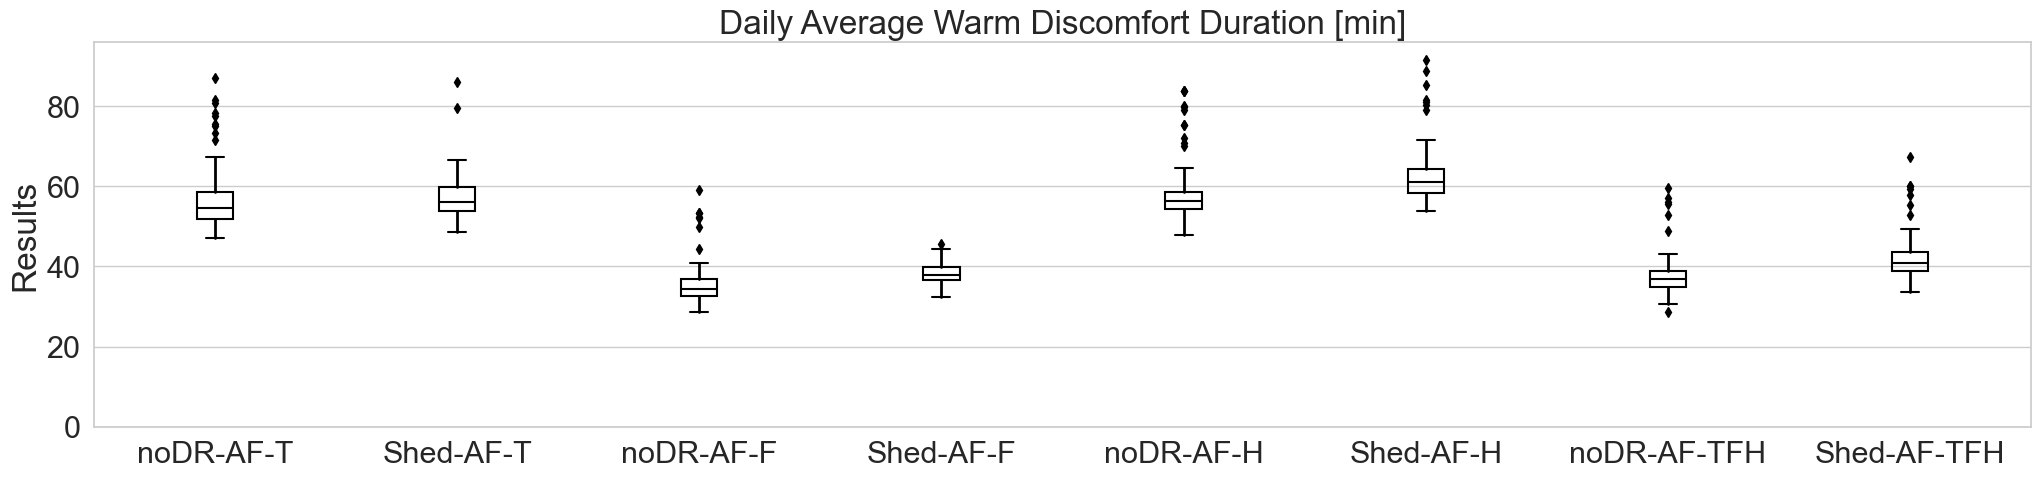

In [14]:
# Scenarios to plot
# filtered_source_labels = ["noDR-AF-T", "noDR-noAF-T", 
#                           "noDR-AF-F", "noDR-noAF-F", 
#                           "noDR-AF-H", "noDR-noAF-H", 
#                           "noDR-AF-TFH", "noDR-noAF-TFH"]
# filtered_source_labels = ["noDR-AF-T", "noDR-noAF-T", 
#                           "noDR-AF-F", "noDR-noAF-F", 
#                           "noDR-AF-H", "noDR-noAF-H", 
#                           "noDR-AF-TFH", "noDR-noAF-TFH",
#                           "Shed-AF-T", "Shed-noAF-T",
#                           "Shed-AF-F", "Shed-noAF-F",
#                           "Shed-AF-H", "Shed-noAF-H",
#                           "Shed-AF-TFH", "Shed-noAF-TFH"]
filtered_source_labels = ["noDR-AF-T", "Shed-AF-T", 
                          "noDR-AF-F", "Shed-AF-F", 
                          "noDR-AF-H", "Shed-AF-H", 
                          "noDR-AF-TFH", "Shed-AF-TFH"]

# Create a new filter dataframes
filtered_dataframes = {}

# Iterate over all source labels in the list and filter the dataframes
for label in filtered_source_labels:
   if label in dataframes:
      filtered_dataframes[label] = dataframes[label]

# Collect all dataframes in the dictionary into a list
dfs = list(filtered_dataframes.values())

# Concatenate dataframes
df_all = pd.concat(dfs, ignore_index=True)

# Plots
dx = "Source"
dy = df_all.columns[55] #54 55 warm discomfort duration
ort = "v"; pal = "Set2"; sigma = 0.2
f, ax = plt.subplots(figsize=(25, 5))

ax=sns.boxplot(x = dx, y = dy, data = df_all, color = "black", width = .15, zorder = 10,\
            showcaps = True, boxprops = {'facecolor':'none', "zorder":10},\
            showfliers=True, whiskerprops = {'linewidth':2, "zorder":10},\
               saturation = 1, orient = ort)

ax.set_xlabel("")
ax.set_ylabel("Results")
ax.set_title("Daily Average Warm Discomfort Duration [min]")
# ax.set_title("Daily Average Cold Discomfort Duration [min]")

# ax.set_ylim(-1,1)
padding = 0.05 * df_all[dy].max()  # 5% of the max value
ax.set_ylim(0, df_all[dy].max() + padding)

plt.show()
# ax.set_yticks(range(0,2,1))
# ax = pt.half_violinplot(x = dx, y = dy, data = df_all, palette = pal, bw = .2, cut = 0.,
#                         scale = "area", width = 10, inner = None, orient = ort)
# ax = pt.RainCloud(x = dx, y = dy, data = df_all, palette = pal, bw = sigma,
#                   width_viol = .6, ax = ax, orient = ort)

Difference comparison using box plots

noDR-AF-T vs Shed-AF-T: 1.9355399995
2.5% quartile: -0.5671149994999998
97.5% quartile: 0.6826440836749992
noDR-AF-F vs Shed-AF-F: 1.93616
2.5% quartile: -0.07200000000000006
97.5% quartile: 0.07999999999999918
noDR-AF-H vs Shed-AF-H: 2.589456665
2.5% quartile: -8.426659661749998
97.5% quartile: 8.603779956749994
noDR-AF-TFH vs Shed-AF-TFH: 2.2798349999999985
2.5% quartile: -7.564403666666696
97.5% quartile: 8.156406208333335


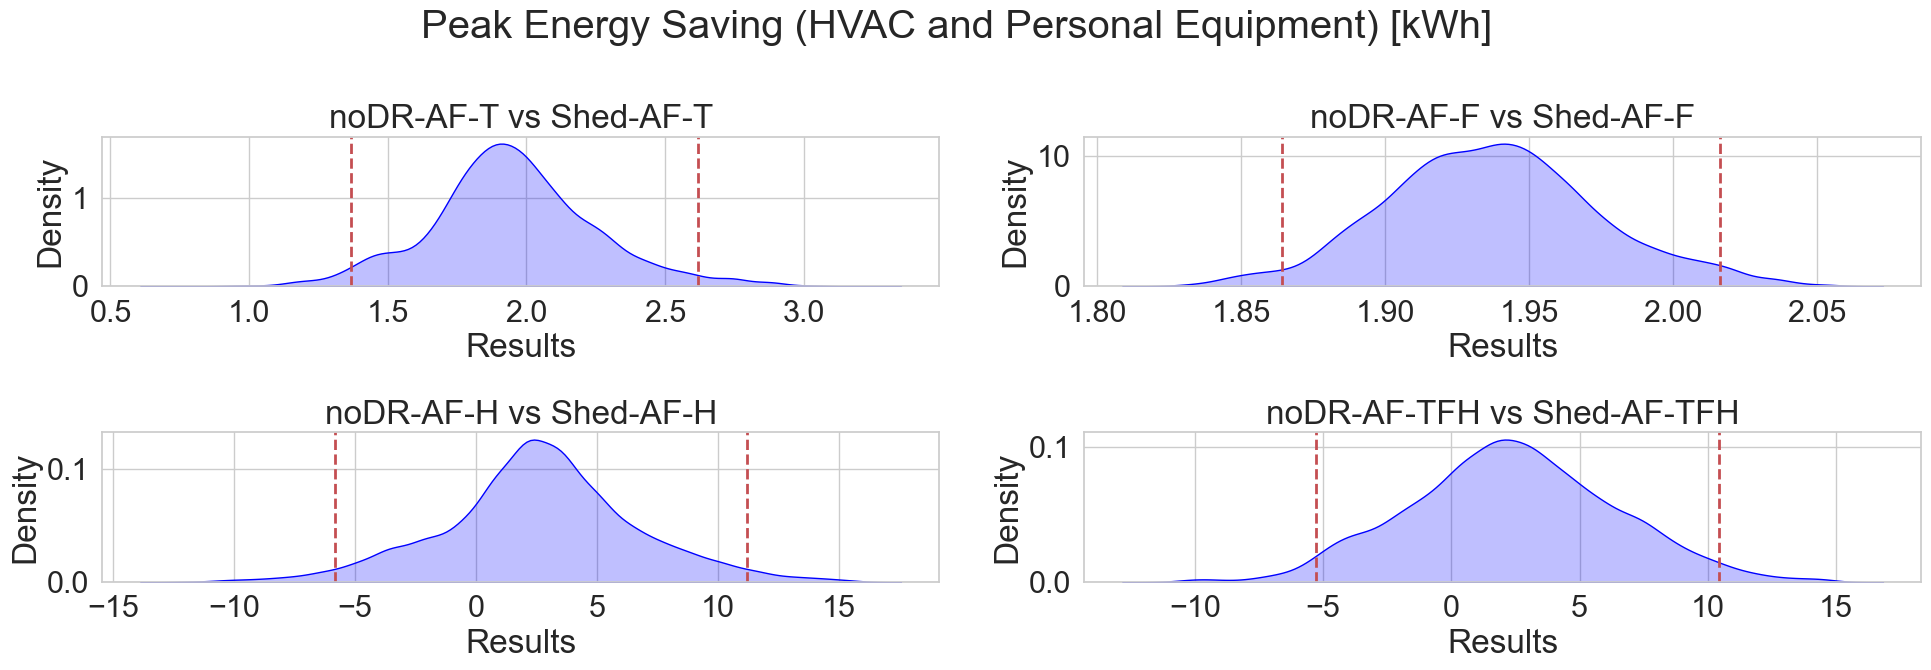

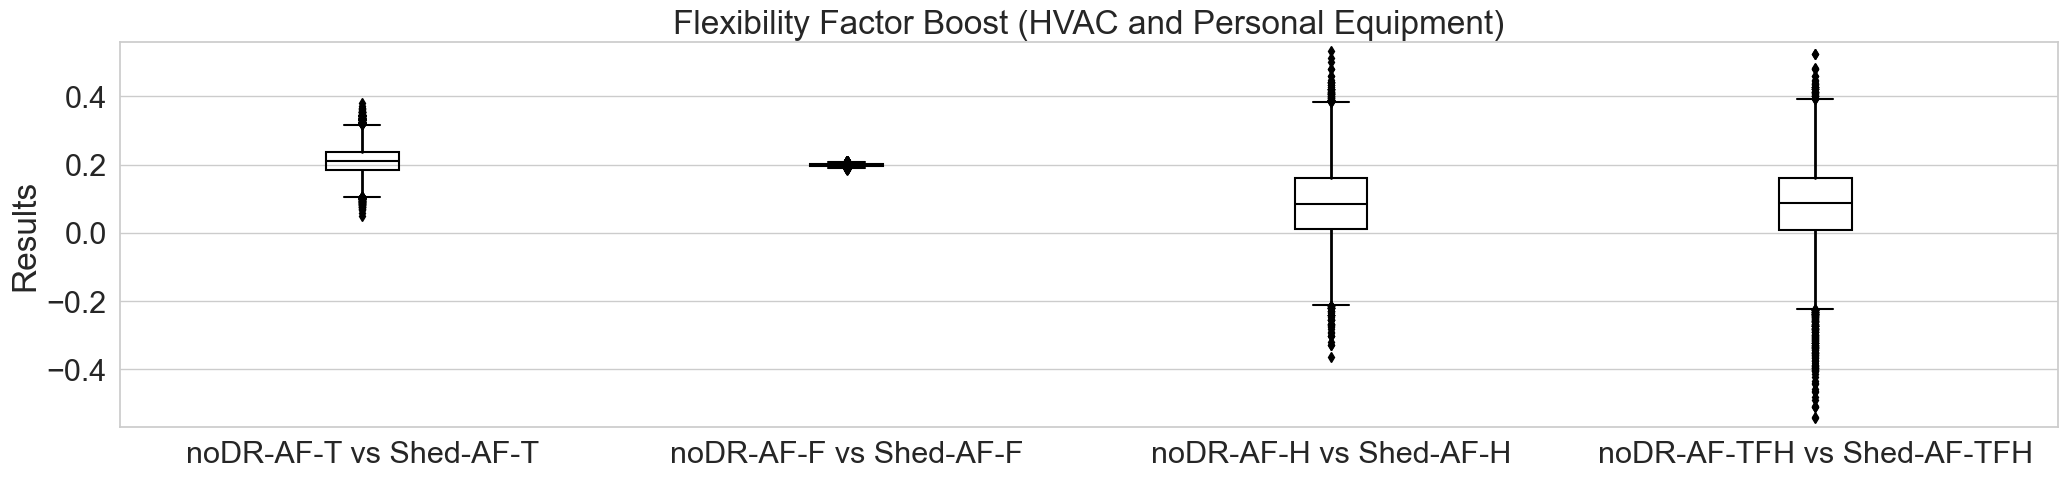

In [15]:
# import itertools
import itertools

# Pairs to compare
pairs = [("noDR-AF-T", "Shed-AF-T"), 
         ("noDR-AF-F", "Shed-AF-F"), 
         ("noDR-AF-H", "Shed-AF-H"), 
         ("noDR-AF-TFH", "Shed-AF-TFH")]

# Create a dffs dictionary to store the difference between the two dataframes
diff_dict = {}

# Column name
column_name = 'Peak Energy Saving (HVAC and Personal Equipment) [kWh]'
# column_name = 'Peak Energy Saving (HVAC and Personal Equipment) [%]'
# column_name = 'Flexibility Factor Boost (HVAC and Personal Equipment)'
# column_name = 'Flexibility Factor Boost (HVAC and Personal Equipment) [%]'

# Create a single figure with four subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 7))
fig.suptitle(f'{column_name}')

for i, pair in enumerate(pairs):
   # Initialize a dataframe
   key_name = f"{pair[0]} vs {pair[1]}"
   diff_dict[key_name] = pd.DataFrame()

   # Create a list of all combinations of the dataframes 
   combinations1 = list(itertools.product(filtered_dataframes[f"{pair[0]}"]['Peak Energy Use (HVAC and Personal Equipment) [kWh]'], 
   filtered_dataframes[f"{pair[1]}"]['Peak Energy Use (HVAC and Personal Equipment) [kWh]']))
   combinations2 = list(itertools.product(filtered_dataframes[f"{pair[0]}"]['Daily FF (HVAC and Personal Equipment)'],
   filtered_dataframes[f"{pair[1]}"]['Daily FF (HVAC and Personal Equipment)']))

   # Calculate the difference between the two dataframes
   diff_dict[key_name]['Peak Energy Saving (HVAC and Personal Equipment) [kWh]'] = [x[0] - x[1] for x in combinations1]
   diff_dict[key_name]['Peak Energy Saving (HVAC and Personal Equipment) [%]'] = [(x[0] - x[1])/x[0]*100 for x in combinations1]
   diff_dict[key_name]['Flexibility Factor Boost (HVAC and Personal Equipment)'] = [x[1] - x[0] for x in combinations2]
   diff_dict[key_name]['Flexibility Factor Boost (HVAC and Personal Equipment) [%]'] = [(x[1] - x[0])/x[0]*100 for x in combinations2]   
   
   # Add a column to include label
   diff_dict[key_name]['Source'] = key_name

   # Plot density plot for each group on their respective subplot
   sns.kdeplot(diff_dict[key_name][column_name], shade=True, color='blue', ax=axs[i//2, i%2])

   # Add vertical lines for 2.5% and 97.5% quartile
   q25, q975 = diff_dict[key_name][column_name].quantile([0.025, 0.975])
   axs[i//2, i%2].axvline(q25, color='r', linestyle='--', linewidth=2, label='2.5% and 97.5% quartiles')
   axs[i//2, i%2].axvline(q975, color='r', linestyle='--', linewidth=2)

   # Add legend and labels to each subplot
   # axs[i//2, i%2].legend(loc='upper left')
   axs[i//2, i%2].set_xlabel('Results')
   axs[i//2, i%2].set_ylabel('Density')
   axs[i//2, i%2].set_title(f"{pair[0]} vs {pair[1]}")

   # Print the median
   print(f"{key_name}: {diff_dict[key_name][column_name].median()}")

   # Print the 2.5% and 97.5% quartile from the median
   print(f"2.5% quartile: {q25 - diff_dict[key_name][column_name].median()}")
   print(f"97.5% quartile: {q975 - diff_dict[key_name][column_name].median()}")



# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

# Collect all dataframes in the dictionary into a list
combined_diff = pd.concat(diff_dict.values(), ignore_index=True)

# Plots
dx = "Source"
dy = combined_diff.columns[2]
ort = "v"; pal = "Set2"; sigma = 0.2
f, ax = plt.subplots(figsize=(25, 5))

ax=sns.boxplot(x = dx, y = dy, data = combined_diff, color = "black", width = .15, zorder = 10,\
            showcaps = True, boxprops = {'facecolor':'none', "zorder":10},\
            showfliers=True, whiskerprops = {'linewidth':2, "zorder":10},\
               saturation = 1, orient = ort)

ax.set_xlabel("")
ax.set_ylabel("Results")
ax.set_title(dy)



# ax.set_ylim(-1,1)
padding = 0.05 * combined_diff[dy].max()  # 5% of the max value
ax.set_ylim(combined_diff[dy].min() - padding, combined_diff[dy].max() + padding)

plt.show()

Statistical comparison between two distribution

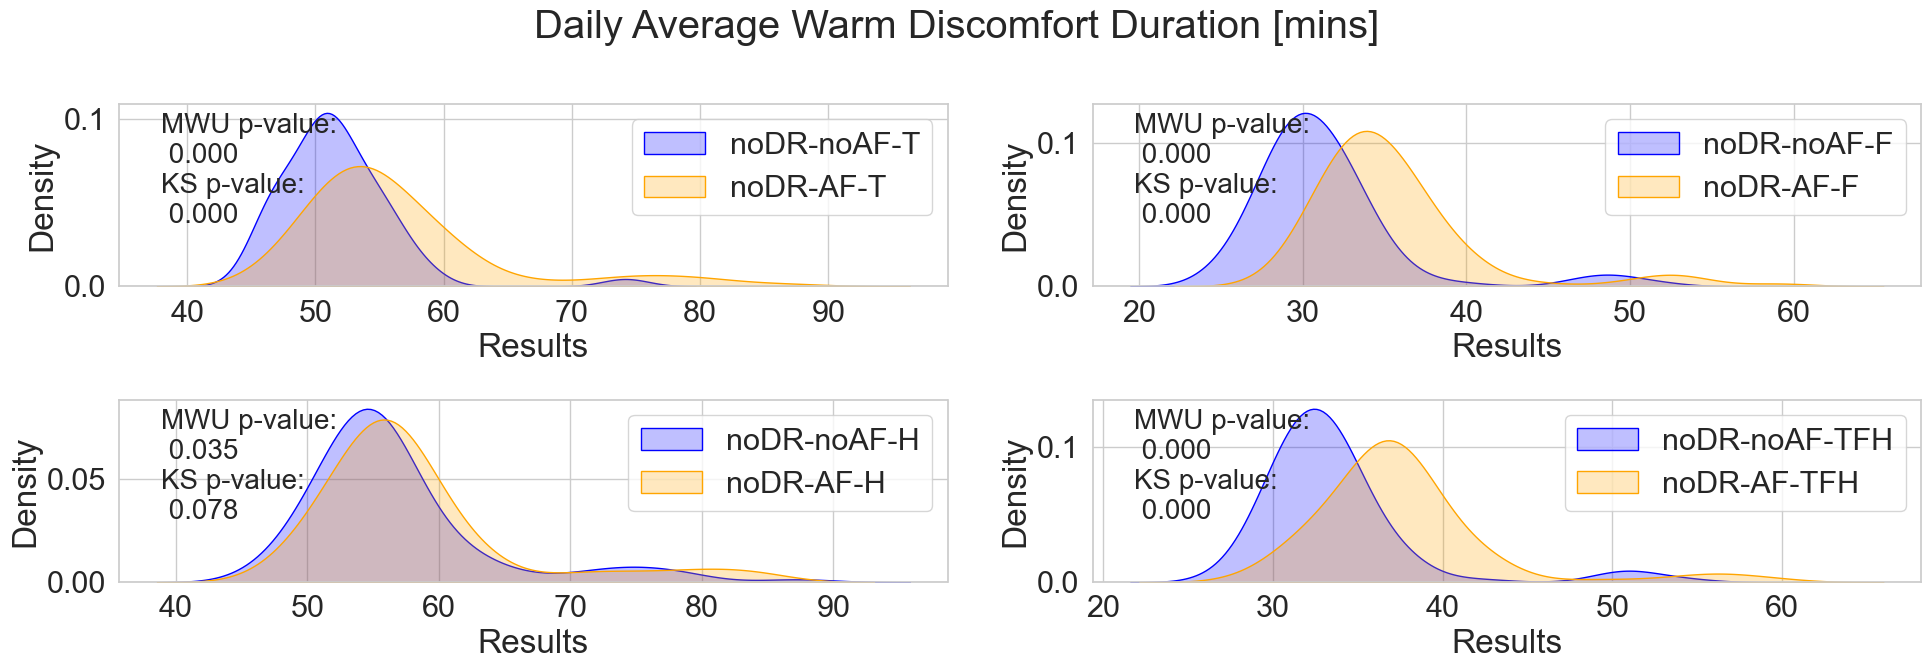

Max relative difference between mean: 13.2%
Max relative difference between median: 12.8%
Max relative difference between Q1: 12.9%
Max relative difference between Q3: 13.4%


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu, ks_2samp
from scipy.stats import shapiro
import seaborn as sns

# Define pairs to compare
# pairs = [('noDR-noAF-T', 'noDR-AF-T'), ('noDR-noAF-F', 'noDR-AF-F'),
#          ('noDR-noAF-H', 'noDR-AF-H'), ('noDR-noAF-TFH', 'noDR-AF-TFH'),
#          ('Shed-noAF-T', 'Shed-AF-T'), ('Shed-noAF-F', 'Shed-AF-F'),
#          ('Shed-noAF-H', 'Shed-AF-H'), ('Shed-noAF-TFH', 'Shed-AF-TFH')]
pairs = [('noDR-noAF-T', 'noDR-AF-T'), ('noDR-noAF-F', 'noDR-AF-F'),
         ('noDR-noAF-H', 'noDR-AF-H'), ('noDR-noAF-TFH', 'noDR-AF-TFH')]

# Column name
# column_name = "Daily Energy Use (HVAC and Personal Equipment) [kWh]"
# column_name = "Peak Energy Use (HVAC and Personal Equipment) [kWh]"
# column_name = "Daily FF (HVAC and Personal Equipment)"
# column_name = "Peak Average Cool Duratin [mins]"
# column_name = "Peak Average Warm Duratin [mins]"
# column_name = "Daily Average Cool Duration [mins]"
column_name = "Daily Average Warm Duration [mins]"


# Create a single figure with four subplots
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 7))
# fig.suptitle(f'{column_name}')
# fig.suptitle('Daily Average Cold Discomfort Duration [mins]')
fig.suptitle('Daily Average Warm Discomfort Duration [mins]')

# Create empty lists to store the values
mean_abs_diff_list = []
median_abs_diff_list = []
mean_rel_diff_list = []
median_rel_diff_list = []
Q1_abs_diff_list = []
Q1_rel_diff_list = []
Q3_abs_diff_list = []
Q3_rel_diff_list = []
# IQR_abs_diff_list = []
# IQR_rel_diff_list = []

# Loop through pairs
for i, pair in enumerate(pairs):
    # Extract data for each pair
    noAF_data = dataframes[pair[0]][column_name]
    AF_data = dataframes[pair[1]][column_name]

    # Calculate absolute difference
    mean_abs_diff = abs(noAF_data.mean() - AF_data.mean())
    median_abs_diff = abs(noAF_data.median() - AF_data.median())
    Q1_abs_diff = abs(noAF_data.quantile(0.25) - AF_data.quantile(0.25))
    Q3_abs_diff = abs(noAF_data.quantile(0.75) - AF_data.quantile(0.75))
    # IQR_abs_diff = abs(abs(noAF_data.quantile(0.75) - noAF_data.quantile(0.25)) - abs(AF_data.quantile(0.75) - AF_data.quantile(0.25)))

    # Calculate relative difference
    mean_rel_diff = mean_abs_diff / noAF_data.mean() * 100
    median_rel_diff = median_abs_diff / noAF_data.median() * 100
    Q1_rel_diff = Q1_abs_diff / noAF_data.quantile(0.25) * 100
    Q3_rel_diff = Q3_abs_diff / noAF_data.quantile(0.75) * 100
    # IQR_rel_diff = IQR_abs_diff / abs(noAF_data.quantile(0.75) - noAF_data.quantile(0.25)) * 100

    # Append the values to the lists
    mean_abs_diff_list.append(mean_abs_diff)
    median_abs_diff_list.append(median_abs_diff)
    mean_rel_diff_list.append(mean_rel_diff)
    median_rel_diff_list.append(median_rel_diff)
    Q1_abs_diff_list.append(Q1_abs_diff)
    Q1_rel_diff_list.append(Q1_rel_diff)
    Q3_abs_diff_list.append(Q3_abs_diff)
    Q3_rel_diff_list.append(Q3_rel_diff)
    # IQR_abs_diff_list.append(IQR_abs_diff)
    # IQR_rel_diff_list.append(IQR_rel_diff)


    # Print results
    # print(f"Absolute difference between mean for {pair[0]} and {pair[1]}: {mean_abs_diff:.1f}")
    # print(f"Absolute difference between median for {pair[0]} and {pair[1]}: {median_abs_diff:.1f}")
    # print(f"Relative difference between mean for {pair[0]} and {pair[1]}: {mean_rel_diff:.1f}%")
    # print(f"Relative difference between median for {pair[0]} and {pair[1]}: {median_rel_diff:.1f}%")   

    # Perform Shapiro-Wilk test
    # stat_noAF, p_noAF = shapiro(noAF_data)
    # stat_AF, p_AF = shapiro(AF_data)

    # Print results
    # print(f"Shapiro-Wilk test for {pair[0]}: statistic={stat_noAF:.3f}, p-value={p_noAF:.3f}")
    # print(f"Shapiro-Wilk test for {pair[1]}: statistic={stat_AF:.3f}, p-value={p_AF:.3f}")


    # Perform Mann-Whitney U test
    u_stat_mannw, p_val_mannw = mannwhitneyu(noAF_data, AF_data)

    # Perform Kolmogorov-Smirnov test
    ks_stat, p_val_ks = ks_2samp(noAF_data, AF_data)

    # Plot density plot for each group on their respective subplot
    sns.kdeplot(noAF_data, shade=True, color='blue', label=pair[0], ax=axs[i//2, i%2])
    sns.kdeplot(AF_data, shade=True, color='orange', label=pair[1], ax=axs[i//2, i%2])

    # Add legend and labels to each subplot
    axs[i//2, i%2].legend(loc='upper right')
    axs[i//2, i%2].set_xlabel('Results')
    axs[i//2, i%2].set_ylabel('Density')

    # Add p-value to each subplot
    axs[i//2, i%2].annotate(f"MWU p-value:\n {p_val_mannw:.3f}\nKS p-value:\n {p_val_ks:.3f}", xy=(0.05, 0.95), xycoords='axes fraction', fontsize=20, ha='left', va='top')

# Show the figure
plt.tight_layout()
plt.show()

# Print max relative difference
print(f"Max relative difference between mean: {max(mean_rel_diff_list):.1f}%")
print(f"Max relative difference between median: {max(median_rel_diff_list):.1f}%")
print(f"Max relative difference between Q1: {max(Q1_rel_diff_list):.1f}%")
print(f"Max relative difference between Q3: {max(Q3_rel_diff_list):.1f}%")
# print(f"Max relative difference between IQR: {max(IQR_rel_diff_list):.1f}%")



Comfort comparison

Median difference: [18.0, 7.0, 1.0, 7.0, 3.5, 0.0, 0.0, 9.0, 1.5, 0.0, 0.0]
Median difference for cool duration: [0.0, 1.0, 0.0, 2.5, 1.5, 0.0, 2.0, 0.0, 1.0, 0.0, 1.0]


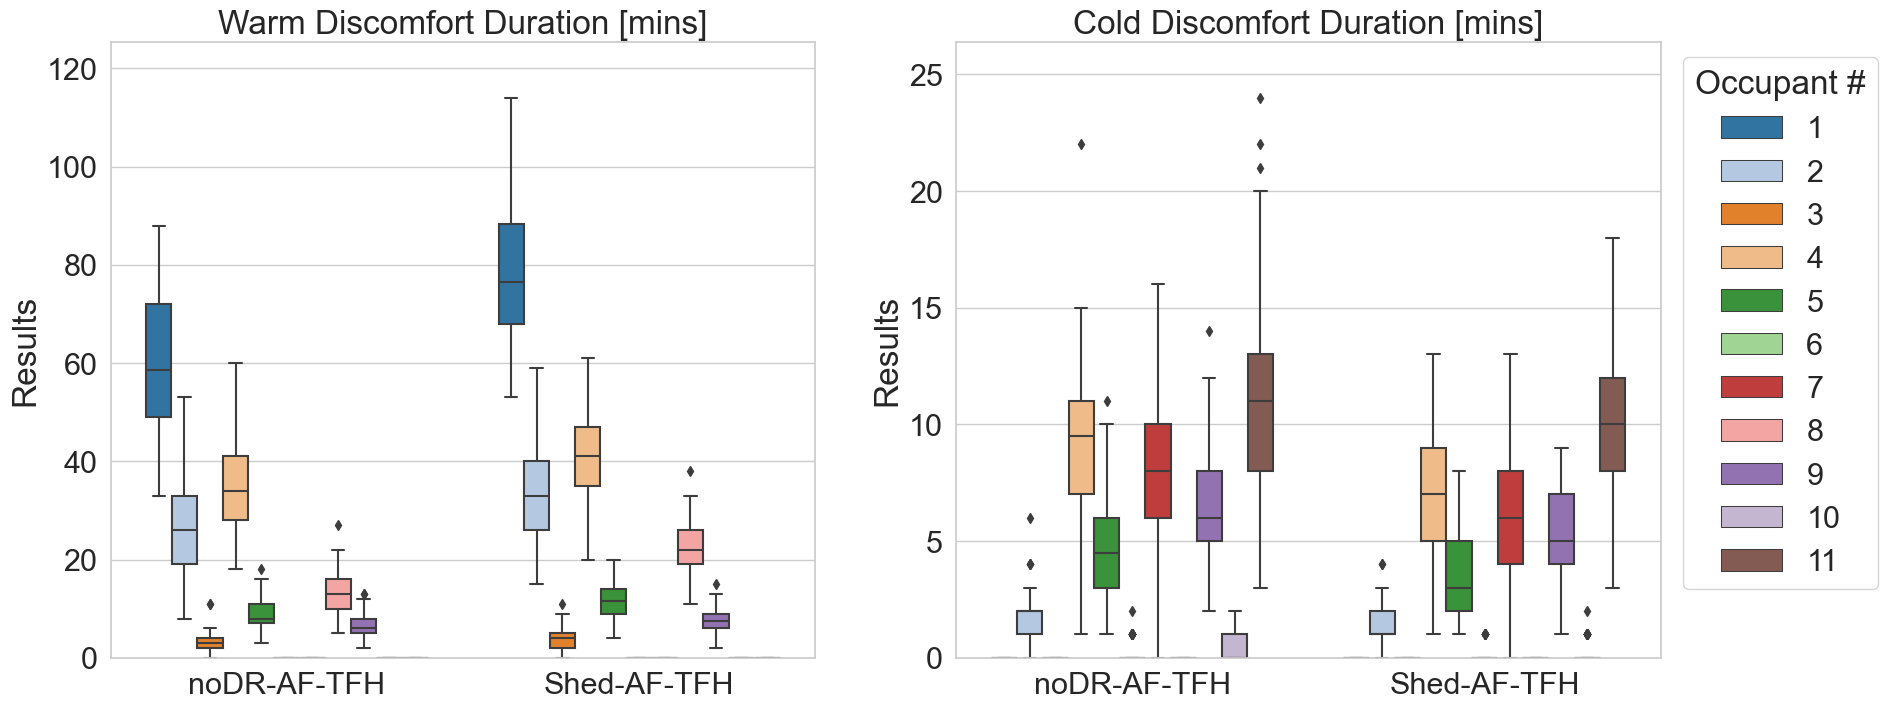

In [17]:
import seaborn as sns
# Specify the two key names to compare
keys = ["noDR-AF-TFH", "Shed-AF-TFH"]

# Initialize a dictionary
df_cool = {}
df_warm = {}

# Create a new dataframe for occupant cool duration
for key in keys:
    df_cool[key] = pd.melt(dataframes[key],
                           value_vars=['Peak Occ#1 Cool Duration [mins]',
                                       'Peak Occ#2 Cool Duration [mins]',
                                       'Peak Occ#3 Cool Duration [mins]',
                                       'Peak Occ#4 Cool Duration [mins]',
                                       'Peak Occ#5 Cool Duration [mins]',
                                       'Peak Occ#6 Cool Duration [mins]',
                                       'Peak Occ#7 Cool Duration [mins]',
                                       'Peak Occ#8 Cool Duration [mins]',
                                       'Peak Occ#9 Cool Duration [mins]',
                                       'Peak Occ#10 Cool Duration [mins]',
                                       'Peak Occ#11 Cool Duration [mins]'],
                                       var_name='Occupant #', 
                                       value_name='Cool Duration [mins]')
    df_cool[key]['Source'] = key
    df_cool[key]['Occupant #'] = df_cool[key]['Occupant #'].replace({'Peak Occ#1 Cool Duration [mins]': '1', 
                                                                     'Peak Occ#2 Cool Duration [mins]': '2',
                                                                     'Peak Occ#3 Cool Duration [mins]': '3',
                                                                     'Peak Occ#4 Cool Duration [mins]': '4',
                                                                     'Peak Occ#5 Cool Duration [mins]': '5',
                                                                     'Peak Occ#6 Cool Duration [mins]': '6',
                                                                     'Peak Occ#7 Cool Duration [mins]': '7',
                                                                     'Peak Occ#8 Cool Duration [mins]': '8',
                                                                     'Peak Occ#9 Cool Duration [mins]': '9',
                                                                     'Peak Occ#10 Cool Duration [mins]': '10',
                                                                     'Peak Occ#11 Cool Duration [mins]': '11'})
    df_warm[key] = pd.melt(dataframes[key],
                            value_vars=['Peak Occ#1 Warm Duration [mins]',
                                        'Peak Occ#2 Warm Duration [mins]',
                                        'Peak Occ#3 Warm Duration [mins]',
                                        'Peak Occ#4 Warm Duration [mins]',
                                        'Peak Occ#5 Warm Duration [mins]',
                                        'Peak Occ#6 Warm Duration [mins]',
                                        'Peak Occ#7 Warm Duration [mins]',
                                        'Peak Occ#8 Warm Duration [mins]',
                                        'Peak Occ#9 Warm Duration [mins]',
                                        'Peak Occ#10 Warm Duration [mins]',
                                        'Peak Occ#11 Warm Duration [mins]'],
                                        var_name='Occupant #', 
                                        value_name='Warm Duration [mins]')
    df_warm[key]['Source'] = key
    df_warm[key]['Occupant #'] = df_warm[key]['Occupant #'].replace({'Peak Occ#1 Warm Duration [mins]': '1',
                                                                     'Peak Occ#2 Warm Duration [mins]': '2',
                                                                     'Peak Occ#3 Warm Duration [mins]': '3',
                                                                     'Peak Occ#4 Warm Duration [mins]': '4',
                                                                     'Peak Occ#5 Warm Duration [mins]': '5',
                                                                     'Peak Occ#6 Warm Duration [mins]': '6',
                                                                     'Peak Occ#7 Warm Duration [mins]': '7',
                                                                     'Peak Occ#8 Warm Duration [mins]': '8',
                                                                     'Peak Occ#9 Warm Duration [mins]': '9',
                                                                     'Peak Occ#10 Warm Duration [mins]': '10',
                                                                     'Peak Occ#11 Warm Duration [mins]': '11'})                                                                     
                           
# Combine the two dataframes into a single dataframe
df_cool_combined = pd.concat([df_cool[keys[0]],df_cool[keys[1]]], ignore_index=True)
df_warm_combined = pd.concat([df_warm[keys[0]],df_warm[keys[1]]], ignore_index=True)

# Create a palette to color the boxplots
my_palette = sns.color_palette("tab20", 11)

# Set the figure size
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

# Create the boxplot for warm duration
sns.boxplot(y="Warm Duration [mins]", x="Source", hue="Occupant #", data=df_warm_combined, palette=my_palette, dodge=True, ax=axs[0], orient='v')
axs[0].set_title("Warm Discomfort Duration [mins]")
axs[0].set_ylabel("Results")
axs[0].set_xlabel("")
axs[0].set_ylim([0, 1.1*max(df_warm_combined["Warm Duration [mins]"])])
axs[0].legend().set_visible(False)

# Create the boxplot for cool duration
sns.boxplot(y="Cool Duration [mins]", x="Source", hue="Occupant #", data=df_cool_combined, palette=my_palette, dodge=True, ax=axs[1], orient='v')
axs[1].set_title("Cold Discomfort Duration [mins]")
axs[1].set_ylabel("Results")
axs[1].set_xlabel("")
axs[1].set_ylim([0, 1.1*max(df_cool_combined["Cool Duration [mins]"])])
axs[1].legend(title='Occupant #', bbox_to_anchor=(1.01, 1), loc='upper left')

# Calculate the difference of each occupant's warm discomfort duration medians between the two group
median_diff_list = []
for i in range(1, 12):
    median_diff = abs(df_warm[keys[0]][df_warm[keys[0]]['Occupant #'] == str(i)]['Warm Duration [mins]'].median() - df_warm[keys[1]][df_warm[keys[1]]['Occupant #'] == str(i)]['Warm Duration [mins]'].median())
    median_diff_list.append(median_diff)

# Print the median difference
print(f"Median difference: {median_diff_list}")

# Calculate the difference of each occupant's cool discomfort duration medians between the two group
median_diff_cool_list = []
for i in range(1, 12):
    median_diff_cool = abs(df_cool[keys[0]][df_cool[keys[0]]['Occupant #'] == str(i)]['Cool Duration [mins]'].median() - df_cool[keys[1]][df_cool[keys[1]]['Occupant #'] == str(i)]['Cool Duration [mins]'].median())
    median_diff_cool_list.append(median_diff_cool)

# Print the median difference for cool duration
print(f"Median difference for cool duration: {median_diff_cool_list}")


# Show the plot
plt.show()


Occupant behaviors

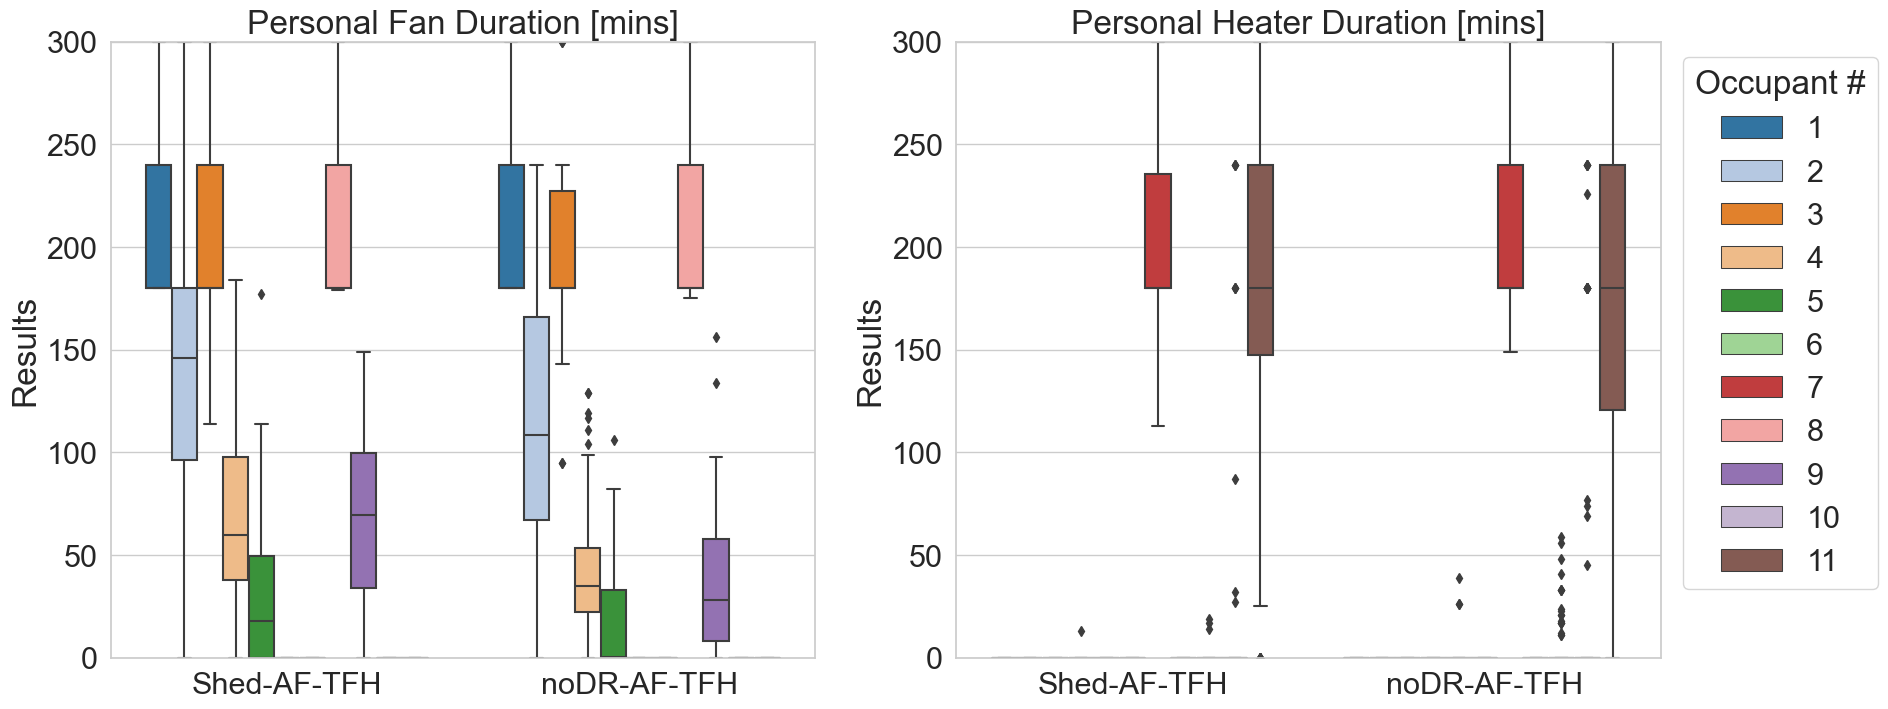

In [18]:
# Specify the two key names to compare
keys = ["noDR-AF-TFH", "Shed-AF-TFH"]

# Load data
df1_occ = pd.read_csv ("post_data/noDR-AF-TFH-1hr_peak_occ.csv", sep= ",")
df2_occ = pd.read_csv ("post_data/Shed-AF-TFH-1hr_peak_occ.csv", sep= ",")

# Add a column to df2 indicating the source
df1_occ['Source'] = keys[0]
df2_occ['Source'] = keys[1]

# Append df2 to df1 and create a new data frame
df_occ = pd.concat([df2_occ,df1_occ], ignore_index=True)

# Create a palette to color the boxplots
my_palette = sns.color_palette("tab20", 11)

# Set the figure size
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

# Create the boxplot for warm duration
sns.boxplot(y="Personal Fan Duration [mins]", x="Source", hue="Occupant #", data=df_occ, palette=my_palette, dodge=True, ax=axs[0], orient='v')
axs[0].set_title("Personal Fan Duration [mins]")
axs[0].set_ylabel("Results")
axs[0].set_xlabel("")
axs[0].set_ylim([0, 300])
axs[0].legend().set_visible(False)

# Create the boxplot for cool duration
sns.boxplot(y="Personal Heater Duration [mins]", x="Source", hue="Occupant #", data=df_occ, palette=my_palette, dodge=True, ax=axs[1], orient='v')
axs[1].set_title("Personal Heater Duration [mins]")
axs[1].set_ylabel("Results")
axs[1].set_xlabel("")
axs[1].set_ylim([0, 300])
axs[1].legend(title='Occupant #', bbox_to_anchor=(1.01, 1), loc='upper left')




Relationship between occupant behaviors and occupant Presence

c:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


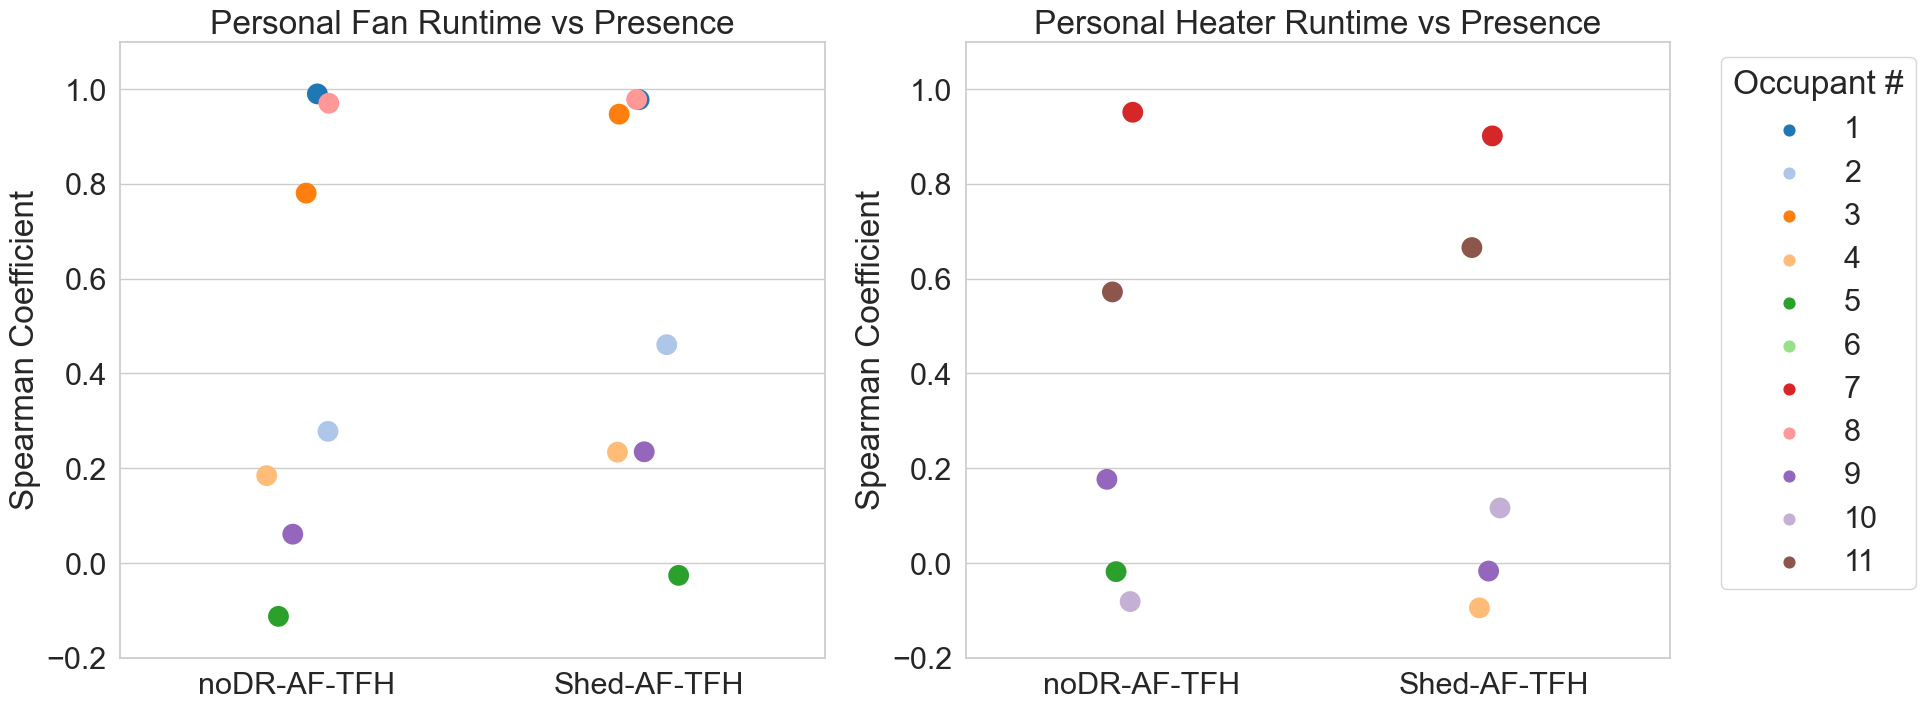

In [19]:
import pandas as pd
from scipy.stats import spearmanr
import seaborn as sns

# Specify the two key names to compare
keys = ["noDR-AF-TFH", "Shed-AF-TFH"]

# Load data
df = {}
df[keys[0]] = pd.read_csv ("post_data/noDR-AF-TFH-1hr_peak_occ.csv", sep= ",")
df[keys[1]] = pd.read_csv ("post_data/Shed-AF-TFH-1hr_peak_occ.csv", sep= ",")
results_df = {}
results_df_melt = {}

# Initialize a dictionary to store the Spearman correlation coefficient
spearman_dict = {}
for key in keys:
    spearman_dict[key] = {}
    for col in df[key].columns:
        spearman_dict[key][col] = []

# Loop through each dataframe
for key in keys:
    # Loop through each occupant
    for i in range(1,12):
        # Extract data for each occupant
        data = df[key][df[key]['Occupant #'] == i]
        # Loop through each column in the dataframe
        for col in df[key].columns:
            # Calculate the Spearman correlation coefficient between the column and the last column
            rho, pval = spearmanr(data[col], data['In-Office Duration [mins]'])
            # Store the results in a dictionary
            spearman_dict[key][col].append(rho)

# Loop through each key
for key in keys:
    # Create a new dataframe with the results
    results_df[key] = pd.DataFrame({'Fan vs Presence': spearman_dict[key]['Personal Fan Duration [mins]'],
                               'Heater vs Presence': spearman_dict[key]['Personal Heater Duration [mins]'],
                               'Occupant #': range(1,12)})
    # Melt the dataframe
    results_df_melt[key] = pd.melt(results_df[key], id_vars=['Occupant #'], var_name='Category', value_name='Spearman Coefficient')

results_df['Fan vs Presence'] = pd.DataFrame({'noDR-AF-TFH': spearman_dict['noDR-AF-TFH']['Personal Fan Duration [mins]'],
                                'Shed-AF-TFH': spearman_dict['Shed-AF-TFH']['Personal Fan Duration [mins]'],
                                'Occupant #': range(1,12)})
results_df['Heater vs Presence'] = pd.DataFrame({'noDR-AF-TFH': spearman_dict['noDR-AF-TFH']['Personal Heater Duration [mins]'],
                                'Shed-AF-TFH': spearman_dict['Shed-AF-TFH']['Personal Heater Duration [mins]'],
                                'Occupant #': range(1,12)})
    
# Melt the dataframe
results_df_melt['Fan vs Presence'] = pd.melt(results_df['Fan vs Presence'], id_vars=['Occupant #'], var_name='Scenario', value_name='Spearman Coefficient')
results_df_melt['Heater vs Presence'] = pd.melt(results_df['Heater vs Presence'], id_vars=['Occupant #'], var_name='Scenario', value_name='Spearman Coefficient')

# Create 2x1 subplots
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

# Create the plot
sns.stripplot(x='Scenario', y='Spearman Coefficient', hue='Occupant #', data=results_df_melt['Fan vs Presence'] , palette=my_palette, ax=axs[0], s=15)
axs[0].set_title("Personal Fan Runtime vs Presence")
axs[0].set_xlabel("")
axs[0].legend().set_visible(False)
axs[0].set_ylim([-0.2,1.1])

sns.stripplot(x='Scenario', y='Spearman Coefficient', hue='Occupant #', data=results_df_melt['Heater vs Presence'], palette=my_palette, ax=axs[1], s=15)
axs[1].set_title("Personal Heater Runtime vs Presence")
axs[1].set_xlabel("")
axs[1].legend(title='Occupant #', bbox_to_anchor=(1.05, 1), loc='upper left')
axs[1].set_ylim([-0.2,1.1])

# Show the plot
plt.show()

# # Define a list of markers, one for each 'Occupant #'
# markers = ['o', 's', '^', 'D', 'v', '>', '<', 'p', '*', 'h', 'x']

# # Create 2x1 subplots
# fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

# # Loop through each unique occupant and plot with different markers
# for i, occupant in enumerate(sorted(results_df_melt['Fan vs Presense']['Occupant #'].unique())):
#     # Filter data for the specific occupant
#     data = results_df_melt['Fan vs Presense'][results_df_melt['Fan vs Presense']['Occupant #'] == occupant]
#     # Plot using the ith marker from the list
#     axs[0].scatter(data['Scenario'], data['Spearman Coefficient'], 
#                    label=occupant, marker=markers[i], 
#                    color=my_palette[i], s=200)  # You can adjust the size with `s`
# axs[0].set_title('Fan vs Presense')
# axs[0].set_xlabel("")
# axs[0].set_ylabel("Spearman Coefficient")
# axs[0].set_xlim([-0.5,1.5])
# axs[0].set_ylim([-0.2,1])
# axs[0].xaxis.grid(False)

# # Repeat for the second key
# for i, occupant in enumerate(sorted(results_df_melt['Heater vs Presense']['Occupant #'].unique())):
#     # Filter data for the specific occupant
#     data = results_df_melt['Heater vs Presense'][results_df_melt['Heater vs Presense']['Occupant #'] == occupant]
#     # Plot using the ith marker from the list
#     axs[1].scatter(data['Scenario'], data['Spearman Coefficient'], 
#                    label=occupant, marker=markers[i], 
#                    color=my_palette[i], s=200)  # You can adjust the size with `s`
# axs[1].set_title('Heater vs Presense')
# axs[1].set_xlabel("")
# axs[0].set_ylabel("Spearman Coefficient")
# axs[1].set_xlim([-0.5,1.5])
# axs[1].set_ylim([-0.2,1])
# axs[1].xaxis.grid(False)

# # Place a legend outside of the first plot
# axs[1].legend(title='Occupant #', bbox_to_anchor=(1.05, 1), loc='upper left')

# # Adjust the layout so everything fits without overlapping
# plt.tight_layout()

# # Show the plot
# plt.show()


In [20]:
# # Define ECDF function
# def ecdf(data):
#     x = np.sort(data)
#     y = np.arange(1, len(data)+1) / len(data)
#     return x, y

# # Extract data for noDR-AF-T-1hr
# data = dataframes['noDR-AF-T']['Peak Energy Use (HVAC and Personal Equipment) [kWh]']

# # Randomly split the data into two halves
# np.random.seed(42)  # for reproducibility
# half1 = np.random.choice(data, size=len(data)//2, replace=False)
# half2 = np.setdiff1d(data, half1)

# # Perform Mann-Whitney U test
# u_stat_mannw, p_val_mannw = mannwhitneyu(half1, half2)

# # Perform Kolmogorov-Smirnov test
# ks_stat, p_val_ks = ks_2samp(half1, half2)

# # Calculate ECDF for each group
# x_half1, y_half1 = ecdf(half1)
# x_half2, y_half2 = ecdf(half2)

# # Plot ECDF for each group
# fig, ax = plt.subplots(figsize=(8, 5))
# ax.plot(x_half1, y_half1, marker='.', linestyle='none', label='Half 1')
# ax.plot(x_half2, y_half2, marker='.', linestyle='none', label='Half 2')

# # Add legend and labels
# ax.legend(loc='lower right')
# ax.set_xlabel('Peak Energy Use (HVAC and Personal Equipment) [kWh]')
# ax.set_ylabel('ECDF')
# ax.set_ylim([0, 1])

# # Add p-value to the plot
# ax.annotate(f"Mann-Whitney U p-value: {p_val_mannw:.3f}\nKS p-value: {p_val_ks:.3f}", xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12, ha='left', va='top')

# plt.show()

# # Print results
# print(f"Mann-Whitney U statistic: {u_stat_mannw}")
# print(f"p-value (Mann-Whitney U test): {p_val_mannw}")
# print(f"KS statistic: {ks_stat}")
# print(f"p-value (KS test): {p_val_ks}")
